# Q6 Community Detection

In many social networks, many different relations usually exist between a same set of users. In this task, given several datasets, you are required to detect the communities among 419 tweet users. The ground truth consists of `five` communities.

## Reference

* `Node2Vec`: https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf
* COMMUNITY DETECTION USING NETWORKX: https://orbifold.net/default/community-detection-using-networkx/
* https://www.researchgate.net/publication/337469159_Community_detection_in_complex_networks_using_Node2vec_with_spectral_clustering
* Generating A Twitter Ego-Network & Detecting Communities: https://towardsdatascience.com/generating-twitter-ego-networks-detecting-ego-communities-93897883d255

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools

from networkx.algorithms.community.centrality import girvan_newman

## Load network by networkx and implement Node2Vec

In [3]:
df = pd.read_csv('dataset/follow_followedby/follows.mtx', sep=' ')

In [4]:
df.rename(columns={'ids':'A', 'ids.1':'B'},inplace=True) 

In [5]:
df

,A,B,linkage
0,14284260,65357102,1
1,14284260,50714939,1
2,14284260,121127090,1
3,14284260,19825835,1
4,14284260,11564602,1
...,...,...,...
27335,804596460,20356313,1
27336,88974929,14758838,1
27337,88974929,92498317,1
27338,84563846,568174146,1


In [6]:
G = nx.from_pandas_edgelist(df, source='A', target='B', edge_attr="linkage")

In [8]:
num_nodes = G.number_of_nodes() # the number of nodes
num_edges = G.number_of_edges() # the number of edges
print("num_nodes = ", num_nodes)
print("num_edges = ", num_edges)

num_nodes =  418
num_edges =  19950


## Visualize the network

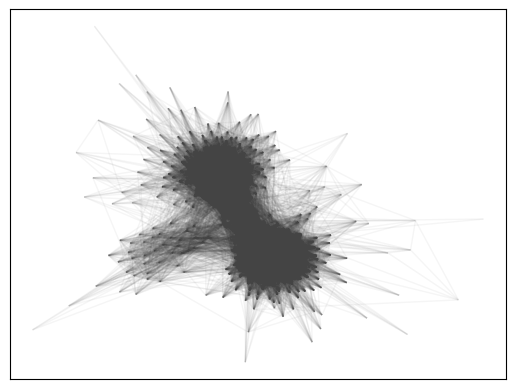

In [9]:
pos = nx.spring_layout(G, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('default')
nx.draw_networkx(
        G, 
        pos=pos, 
        node_size=0, 
        edge_color="#444444", 
        alpha=0.05, 
        with_labels=False)

## Visualize the community detection results

In [11]:
comp = girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= 5, comp) # Stop at finding 5 communities

In [12]:
# Gererate final communities division
i = 2
final_communities = []
for communities in limited:
    print(i)
    if i == 5:
        final_communities = list(communities)
    i += 1

2
3
4
5


In [13]:
print("The number of communities = %s" % len(final_communities))

The number of communities = 5


In [14]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)            

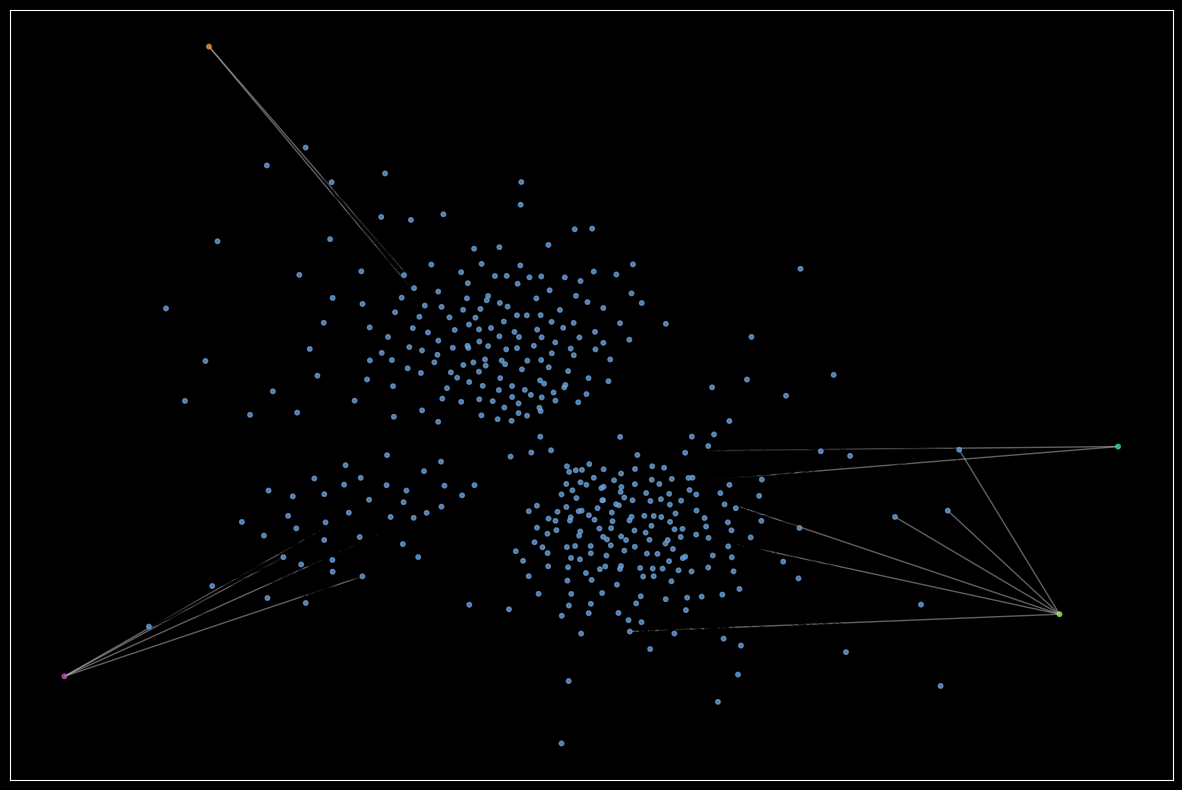

In [15]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

# Set node and edge communities
set_node_community(G, final_communities)
set_edge_community(G)

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
    
# external edges

nx.draw_networkx(
    G, 
    pos=pos, 
    node_size=10, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.5, 
    with_labels=False)

# internal edges

nx.draw_networkx(
    G, 
    pos=pos, 
    node_size=10,
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.5, 
    with_labels=False)

## Output the community detection results

In [16]:
with open("task1_output.mtx", 'w') as f:
    for i in range(5):
        f.write('community'+str(i+1)+': ')
        t = 0
        for node in communities[i]:
            f.write(str(node))
            t += 1
            if t < len(communities[i]):
                f.write(',')
            else:
                f.write('\n')